In [73]:
!wget https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2019/08/03092249/My-village.jpg -O village.jpg

--2024-06-29 09:46:32--  https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2019/08/03092249/My-village.jpg
Resolving d1whtlypfis84e.cloudfront.net (d1whtlypfis84e.cloudfront.net)... 13.226.99.176, 13.226.99.117, 13.226.99.134, ...
Connecting to d1whtlypfis84e.cloudfront.net (d1whtlypfis84e.cloudfront.net)|13.226.99.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105234 (103K) [image/jpeg]
Saving to: ‘village.jpg’

village.jpg         100%[===================>] 102.77K  --.-KB/s    in 0.03s   

2024-06-29 09:46:32 (3.19 MB/s) - ‘village.jpg’ saved [105234/105234]



In [74]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Histograms

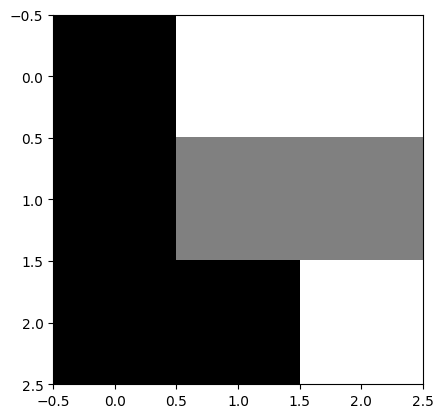

simple_image: [[0 2 2]
 [0 1 1]
 [0 0 2]]


In [75]:
#simple example
simp_image = np.array([[0,2,2],[0,1,1],[0,0,2]],dtype=np.uint8)
plt.imshow(simp_image, cmap="gray")
plt.show()
print("simple_image:",simp_image)

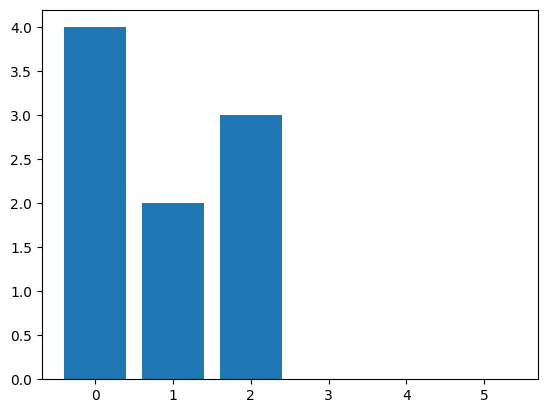

In [76]:
plt.bar([x for x in range(6)],[4,2,3,0,0,0])
plt.show()

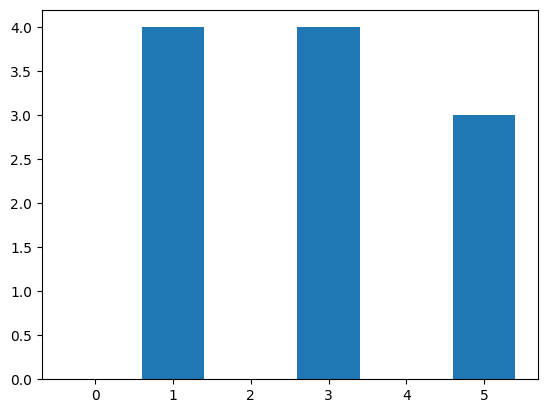

In [77]:
plt.bar([x for x in range(6)],[0,4,0,4,0,3])
plt.show()

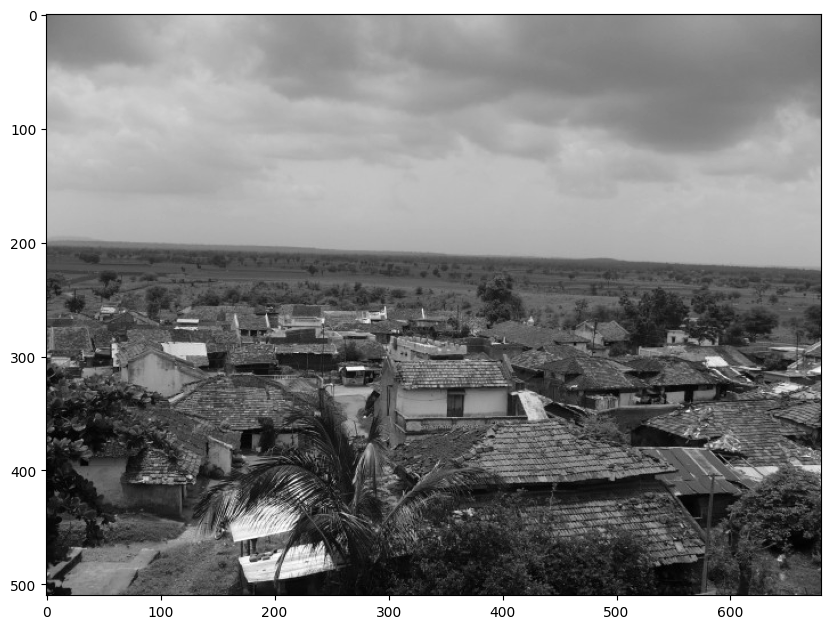

In [78]:
village = cv2.imread("village.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(village,cmap="gray")
plt.show()

In [79]:
hist = cv2.calcHist([village],[0], None, [256], [0,256])

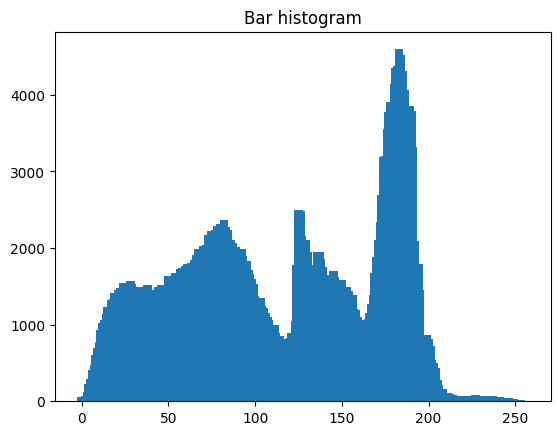

In [80]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

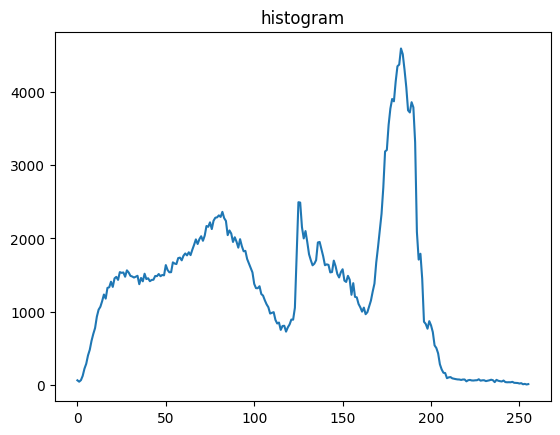

In [81]:
#continuus graph
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

Intensity Transformations

In [82]:
neg_simp_image = -1 * simp_image + 255

print("simp image\n", neg_simp_image)

simp image
 [[255 253 253]
 [255 254 254]
 [255 255 253]]


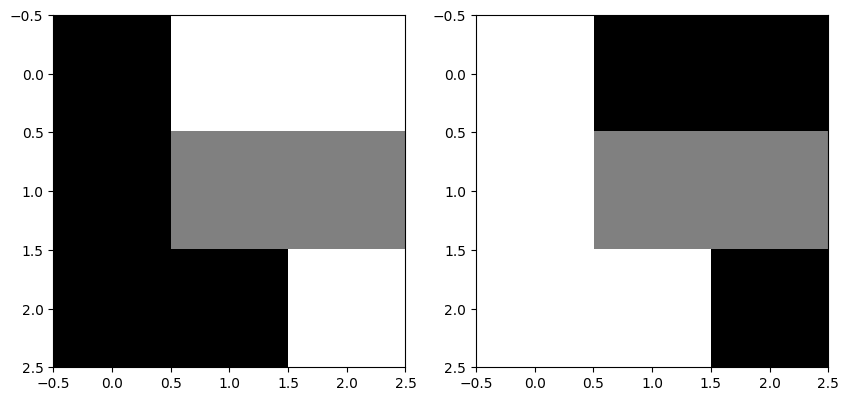

simple_image: [[0 2 2]
 [0 1 1]
 [0 0 2]]


In [83]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(simp_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_simp_image,cmap="gray")
plt.show()
print("simple_image:",simp_image)

Brightness and contrast adjustments

In [84]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control
new_image = cv2.convertScaleAbs(village, alpha=alpha, beta=beta)

In [85]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

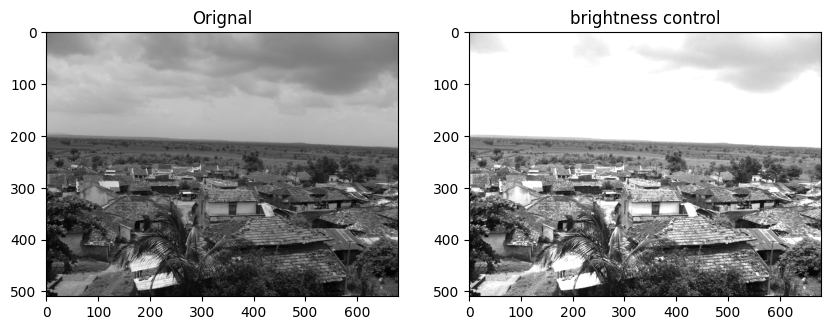

In [86]:
plot_image(village, new_image, title_1 = "Orignal", title_2 = "brightness control")

In [87]:
def plot_hist(old_image, new_image, title_old="Original", title_new="New Image"):
    intensity_values = np.array([x for x in range(256)])
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.4)
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image], [0], None, [256], [0, 256])[:, 0], width=5)
    plt.title(title_old)
    plt.xlabel('Intensity')

    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image], [0], None, [256], [0, 256])[:, 0], width=5)
    plt.title(title_new)
    plt.xlabel('Intensity')

    plt.show()

<Figure size 1000x500 with 0 Axes>

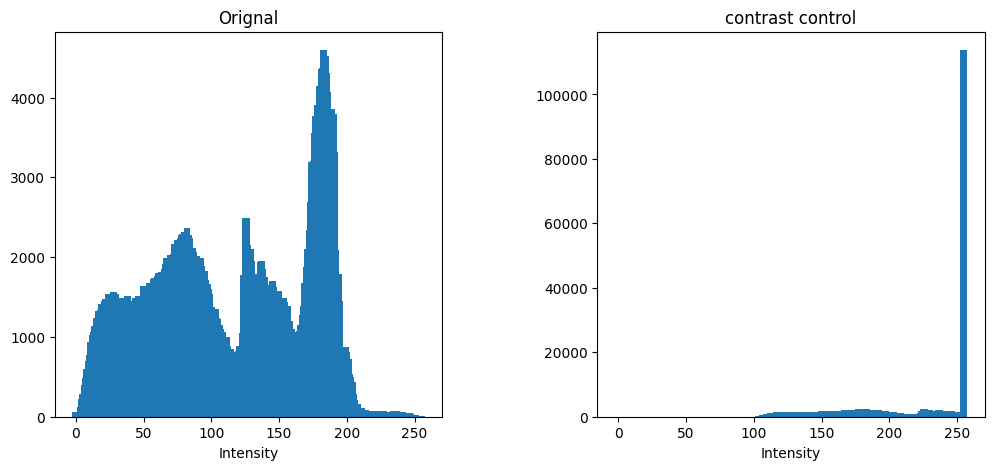

In [88]:
plt.figure(figsize=(10,5))
plot_hist(village, new_image,"Orignal","contrast control")

<Figure size 1000x500 with 0 Axes>

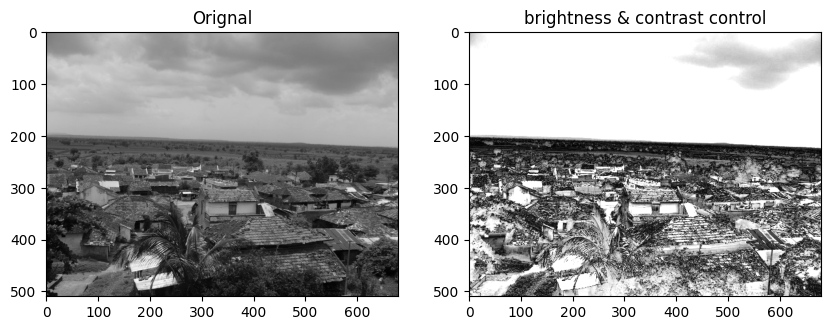

In [89]:
plt.figure(figsize=(10,5))
alpha = 4
beta = -300
new_image = cv2.convertScaleAbs(village, alpha=alpha, beta=beta)

plot_image(village, new_image, "Orignal", "brightness & contrast control")

<Figure size 1000x500 with 0 Axes>

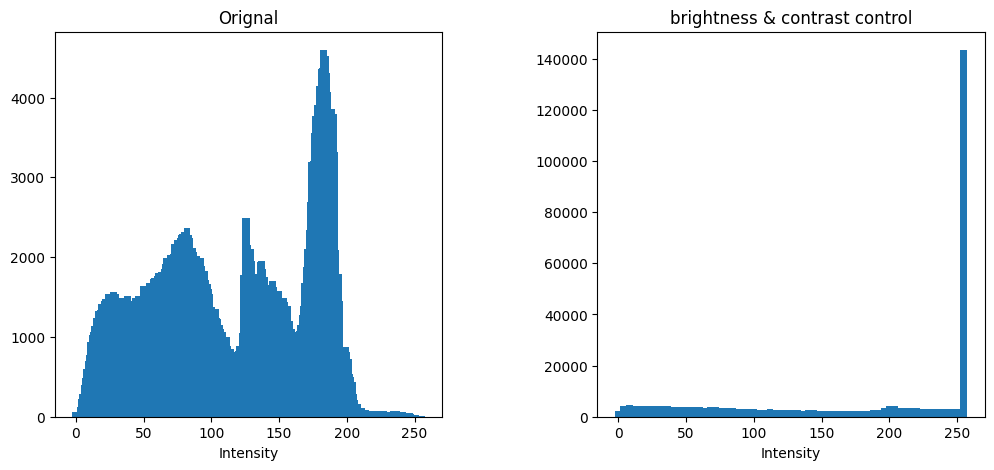

In [90]:
plt.figure(figsize=(10,5))
plot_hist(village, new_image, "Orignal", "brightness & contrast control")

# Histogram Equalization
Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels;

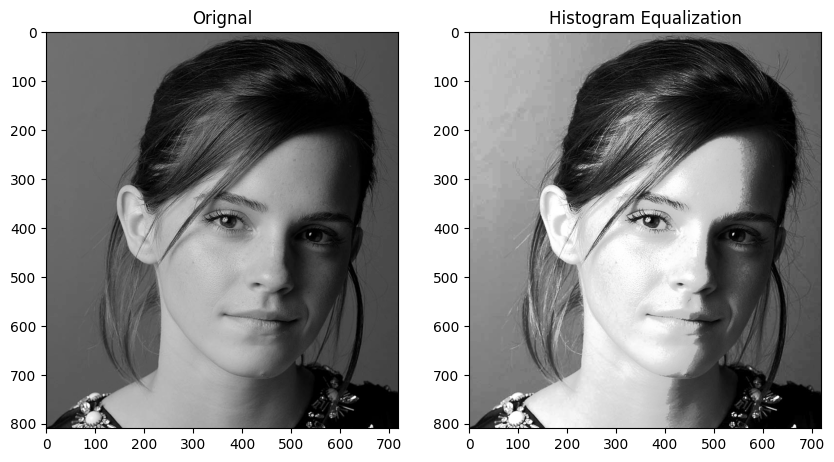

In [91]:
emma = cv2.imread("Emma.jpg",cv2.IMREAD_GRAYSCALE)
new_emma= cv2.equalizeHist(emma)
plot_image(emma,new_emma,"Orignal","Histogram Equalization")

<Figure size 1000x500 with 0 Axes>

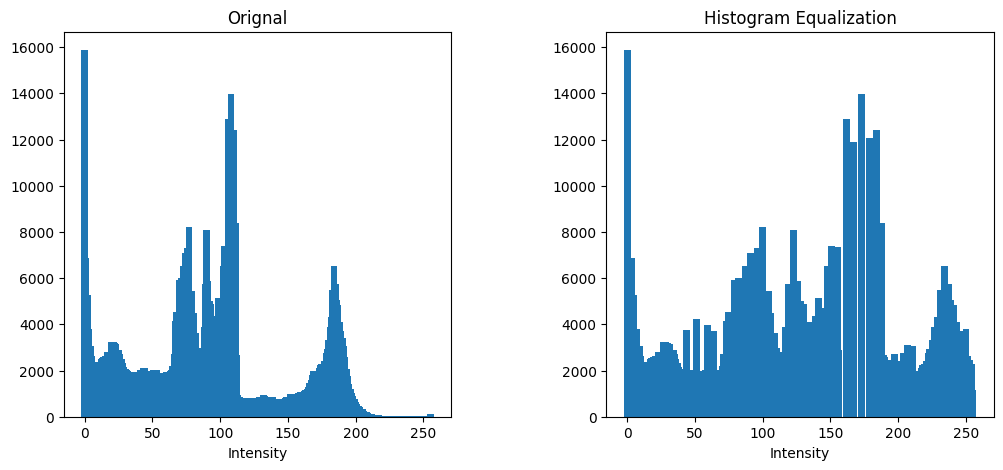

In [92]:
plt.figure(figsize=(10,5))
plot_hist(emma, new_emma,"Orignal","Histogram Equalization")

# Thresholding and Simple Segmentation

In [93]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)

    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value

    return image_out

In [94]:
simp_image

array([[0, 2, 2],
       [0, 1, 1],
       [0, 0, 2]], dtype=uint8)

In [95]:
threshold = 1

thresholding_img = thresholding(simp_image, threshold)
thresholding_img

array([[  0, 255, 255],
       [  0,   0,   0],
       [  0,   0, 255]], dtype=uint8)

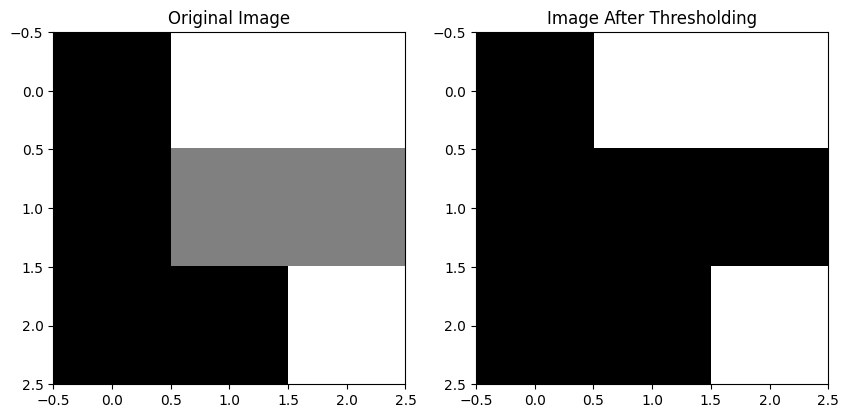

In [96]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(simp_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_img, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

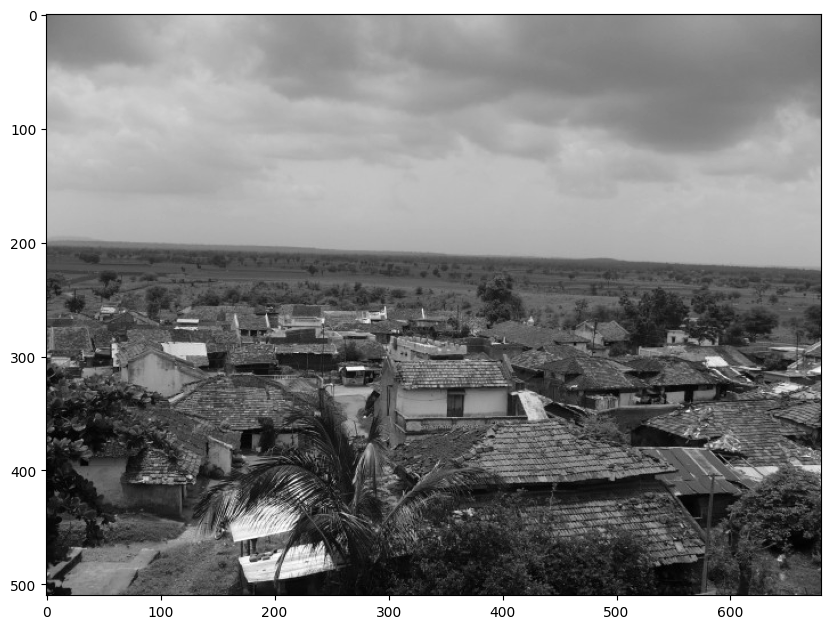

In [97]:
image = cv2.imread("village.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

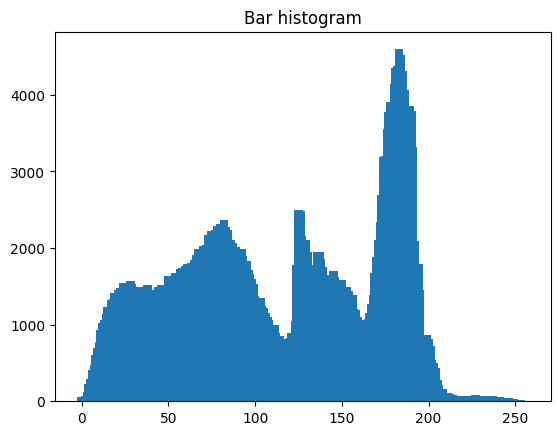

In [98]:
hist = cv2.calcHist([village], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

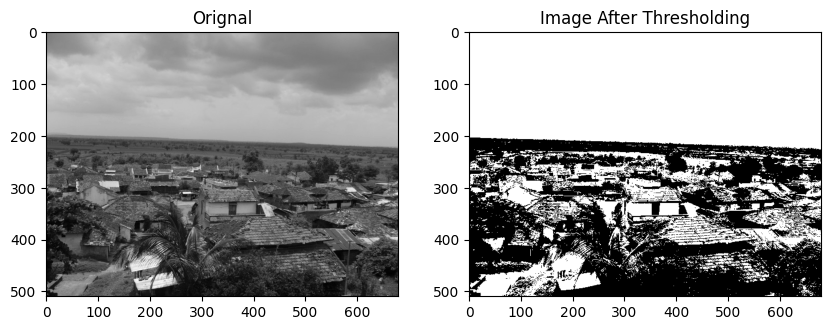

In [99]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

plot_image(image, new_image, "Orignal", "Image After Thresholding")

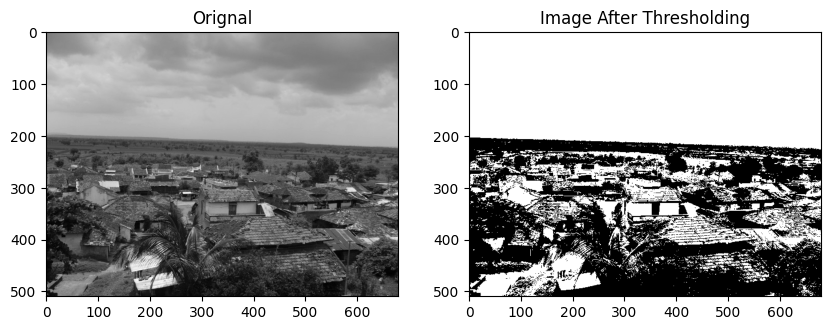

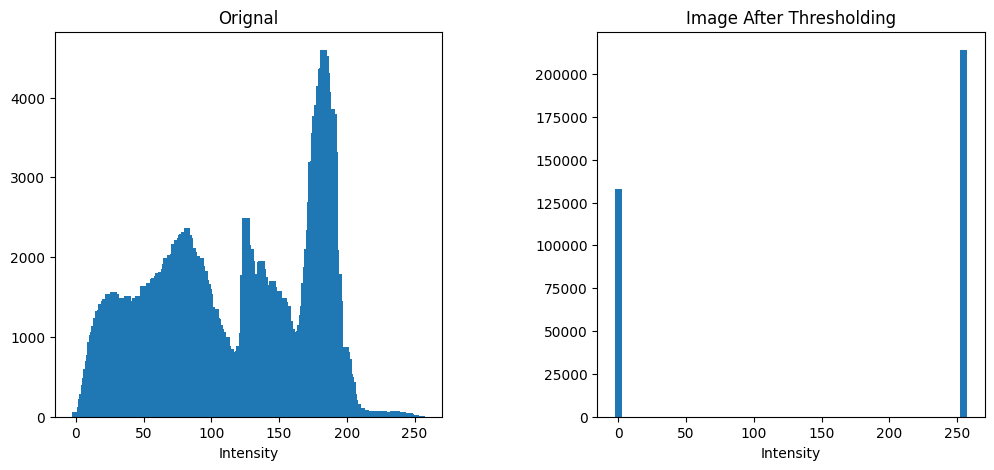

In [100]:
#we can also use cv2.THRESH_BINARY
#cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )

ret, new_image = cv2.threshold(image,87, 255 ,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

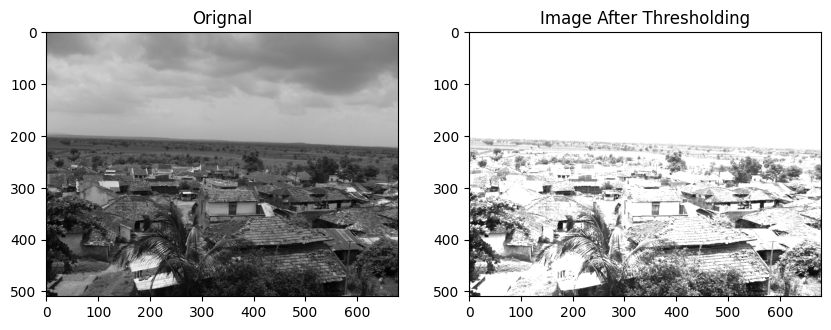

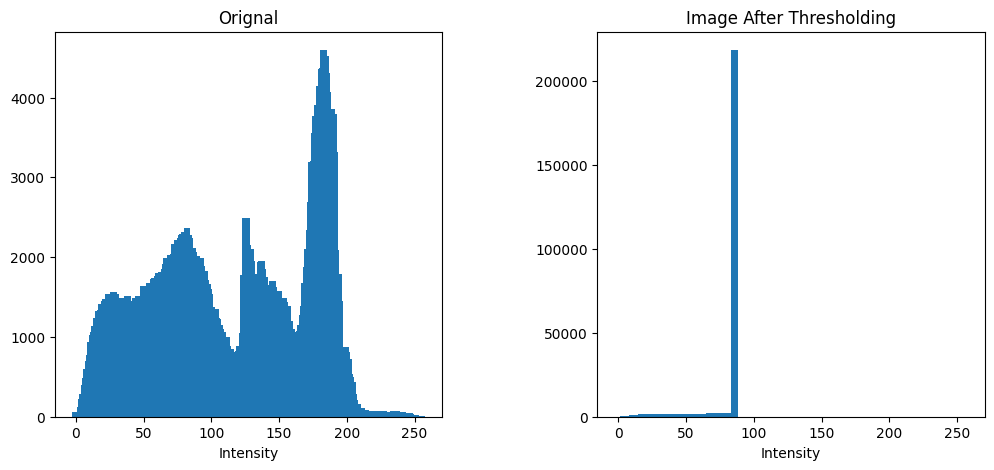

In [101]:
#cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value

ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

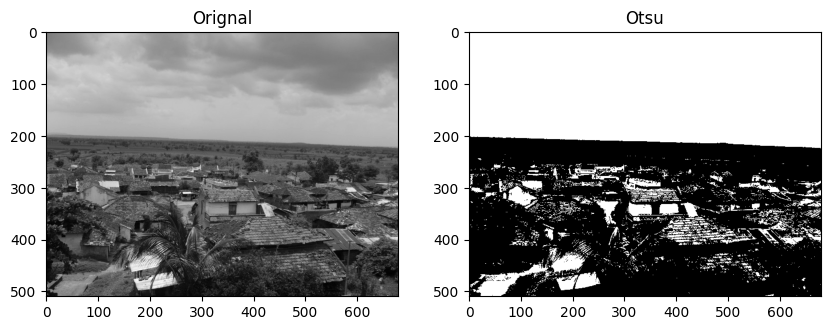

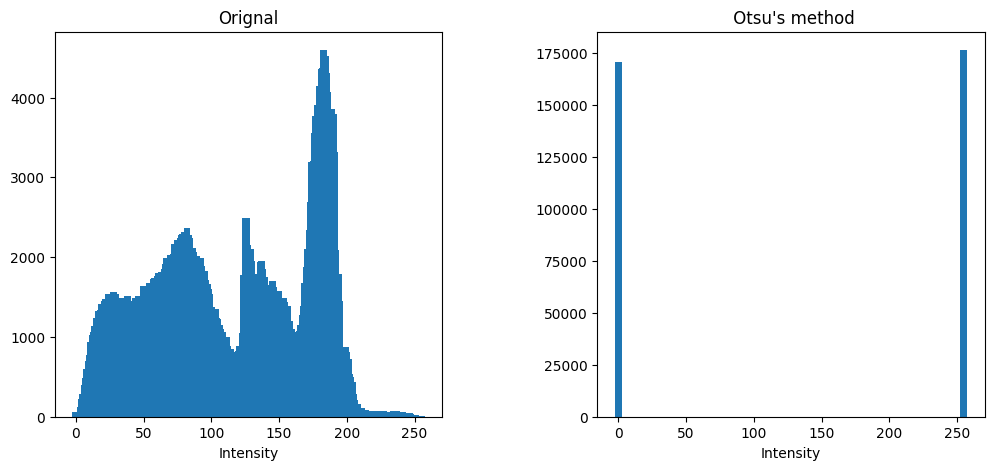

In [102]:
#cv2.THRESH_OTSU avoids having to choose a value and determines it automatically,
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")